# Train Unet on Simulation dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

from util import show, plot_images, plot_tensors, axes_dict_datasize
from data_loader_Sim import load_simulation

In [3]:
import torch

Load the FMD dataset

In [9]:
batch_size = 32
datasize = [batch_size,1,1,128,128]
axes = 'SCTXY'
structures = {'microtubule':10}
psignal_levels = [s for s in range(1,50,2)]
psignal_levels = [s for s in range(1,20,2)]

In [10]:
axes, datasize = axes_dict_datasize(axes, datasize)
print(axes)

{'S': 32, 'C': 1, 'T': 1, 'Z': 1, 'Y': 128, 'X': 128}


In [11]:
loader = load_simulation(batch_size, datasize, axes, structures, psignal_levels)

0 torch.Size([32, 1, 128, 128])
0 torch.Size([32, 1, 128, 128])


../util.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, width, sharex='col', sharey='row', figsize=(width * 4, 4))


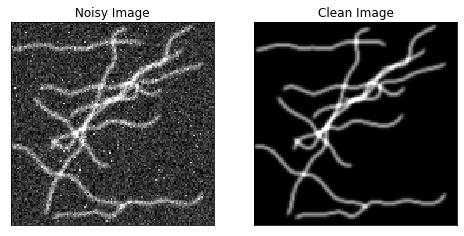

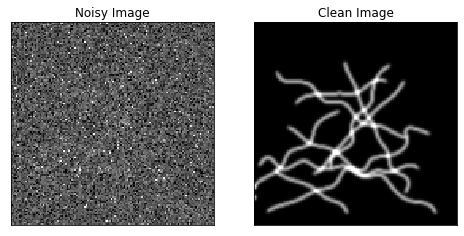

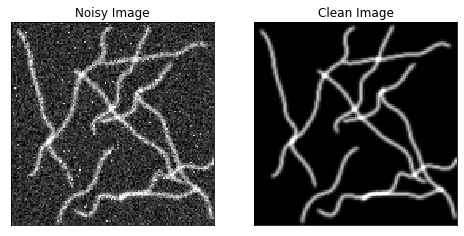

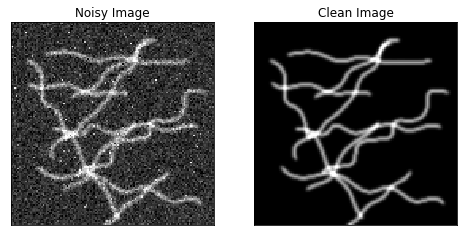

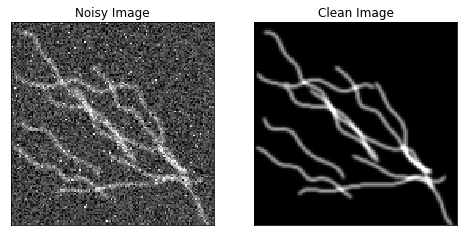

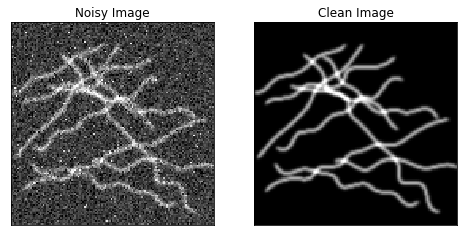

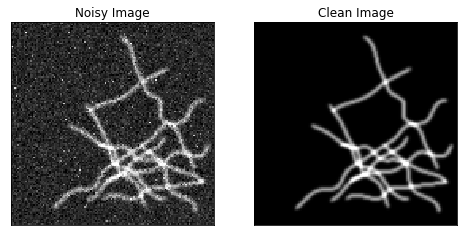

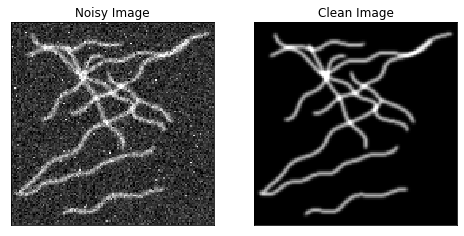

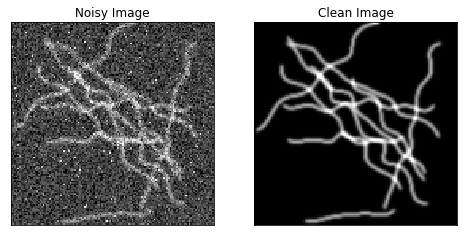

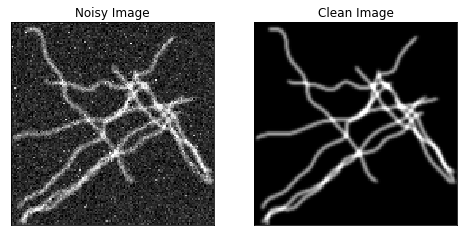

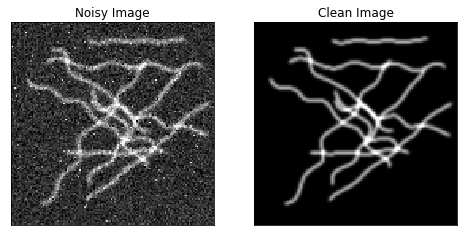

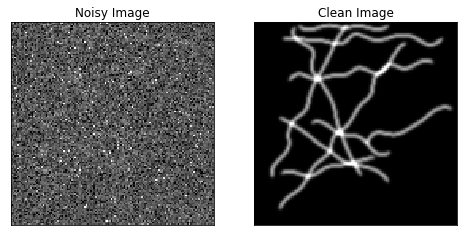

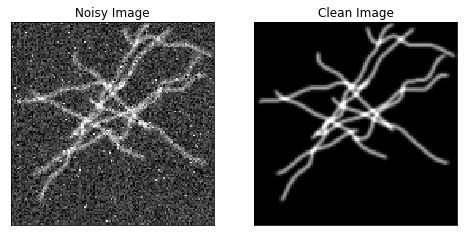

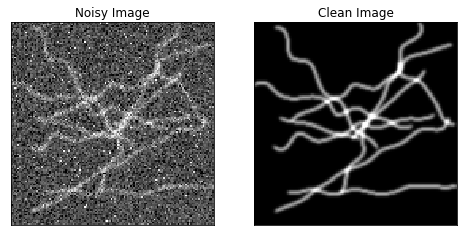

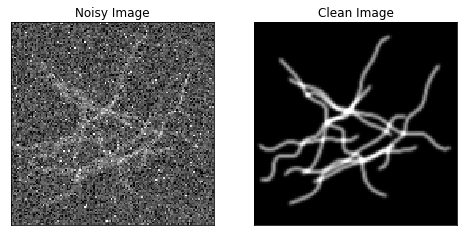

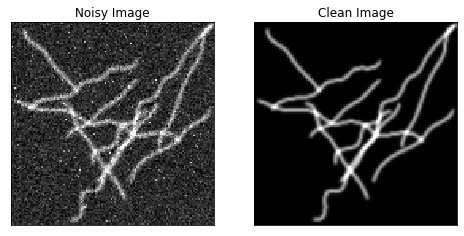

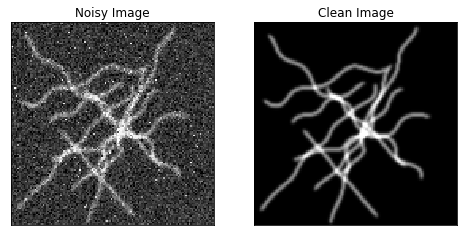

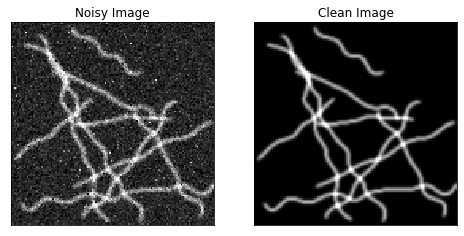

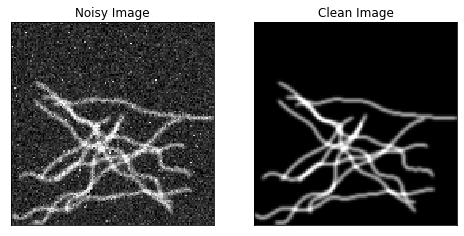

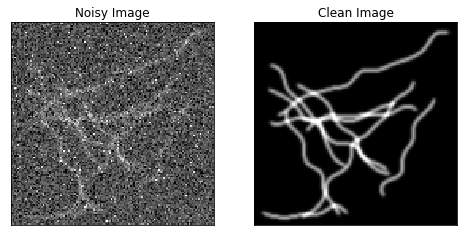

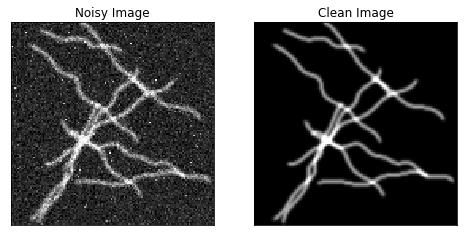

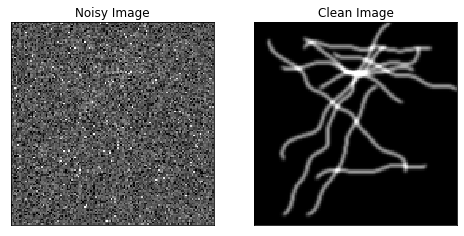

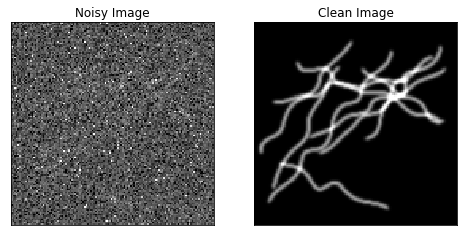

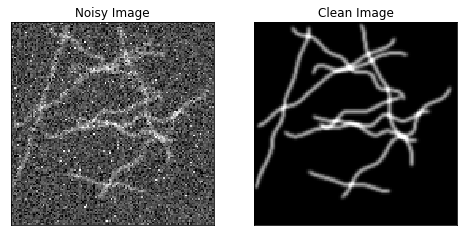

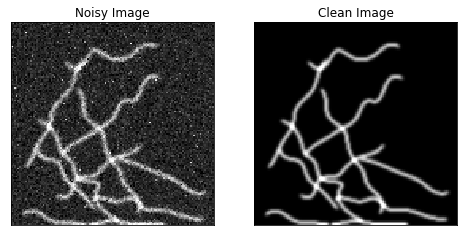

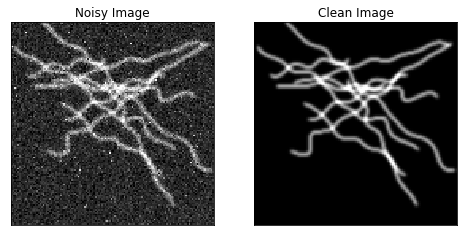

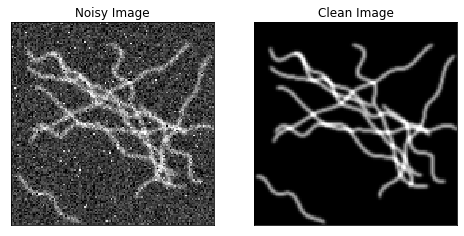

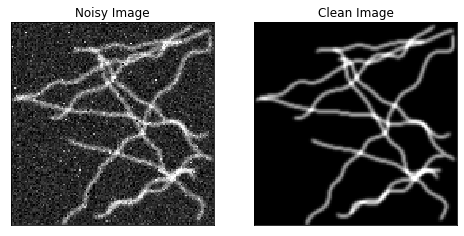

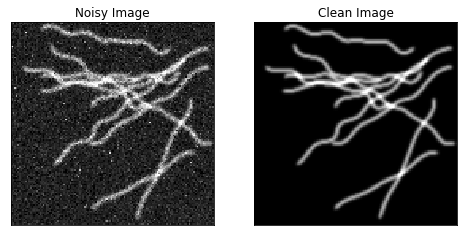

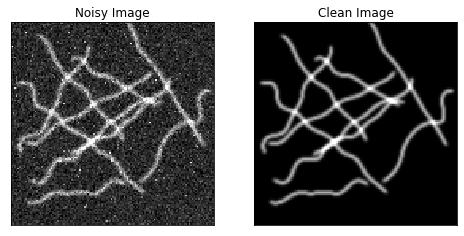

In [13]:
for i_batch, (noisy, clean) in enumerate(loader):
    print(i_batch, noisy.shape)
    print(i_batch, clean.shape)
    for i in range(0,30,1):
        plot_tensors([noisy[i,0,:], clean[i,0,:]], ['Noisy Image', 'Clean Image'])
    break

# Model

In [8]:
from models.unet import Unet
model = Unet(up='nearest')

# Training

In [9]:
from util import getbestgpu
device = getbestgpu(1)

GPU device 0 has 3102 MiB left.
--> GPU device 0 was chosen


In [10]:
model = model.to(device)

In [11]:
from torch.nn import MSELoss
from torch.optim import Adam

loss_function = MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)
n_epoch = 300

[1,     1] loss: 0.03227
[2,     1] loss: 0.81565
[3,     1] loss: 0.02327
[4,     1] loss: 0.03033
[5,     1] loss: 0.03213
[6,     1] loss: 0.03338
[7,     1] loss: 0.03320
[8,     1] loss: 0.03332
[9,     1] loss: 0.03264
[10,     1] loss: 0.02856
[11,     1] loss: 0.03189
[12,     1] loss: 0.02586
[13,     1] loss: 0.02916
[14,     1] loss: 0.02980
[15,     1] loss: 0.02835
[16,     1] loss: 0.02335
[17,     1] loss: 0.02526
[18,     1] loss: 0.02039
[19,     1] loss: 0.02044
[20,     1] loss: 0.02133
[21,     1] loss: 0.02038
[22,     1] loss: 0.01963
[23,     1] loss: 0.01959
[24,     1] loss: 0.01904
[25,     1] loss: 0.01859
[26,     1] loss: 0.01671
[27,     1] loss: 0.01624
[28,     1] loss: 0.01575
[29,     1] loss: 0.01360
[30,     1] loss: 0.01330
[31,     1] loss: 0.01235
[32,     1] loss: 0.01181
[33,     1] loss: 0.01086
[34,     1] loss: 0.01171
[35,     1] loss: 0.01119
[36,     1] loss: 0.01133
[37,     1] loss: 0.01019
[38,     1] loss: 0.01010
[39,     1] loss: 0.0

../util.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, width, sharex='col', sharey='row', figsize=(width * 4, 4))


[202,     1] loss: 0.00226
[203,     1] loss: 0.00188
[204,     1] loss: 0.00228
[205,     1] loss: 0.00236
[206,     1] loss: 0.00213
[207,     1] loss: 0.00263
[208,     1] loss: 0.00164
[209,     1] loss: 0.00230
[210,     1] loss: 0.00278
[211,     1] loss: 0.00282
[212,     1] loss: 0.00185
[213,     1] loss: 0.00292
[214,     1] loss: 0.00170
[215,     1] loss: 0.00178
[216,     1] loss: 0.00289
[217,     1] loss: 0.00181
[218,     1] loss: 0.00200
[219,     1] loss: 0.00223
[220,     1] loss: 0.00168
[221,     1] loss: 0.00228
[222,     1] loss: 0.00238
[223,     1] loss: 0.00400
[224,     1] loss: 0.00229
[225,     1] loss: 0.00176
[226,     1] loss: 0.00300
[227,     1] loss: 0.00233
[228,     1] loss: 0.00328
[229,     1] loss: 0.00246
[230,     1] loss: 0.00345
[231,     1] loss: 0.00170
[232,     1] loss: 0.00146
[233,     1] loss: 0.00197
[234,     1] loss: 0.00310
[235,     1] loss: 0.00251
[236,     1] loss: 0.00196
[237,     1] loss: 0.00200
[238,     1] loss: 0.00184
[

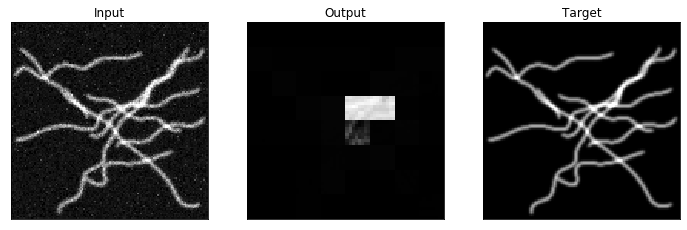

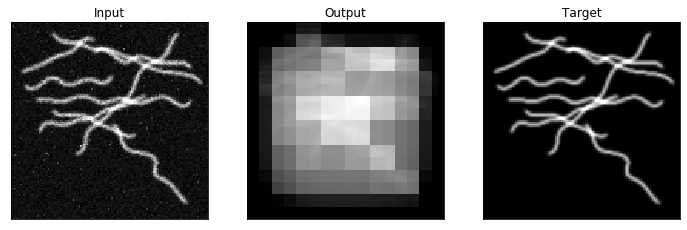

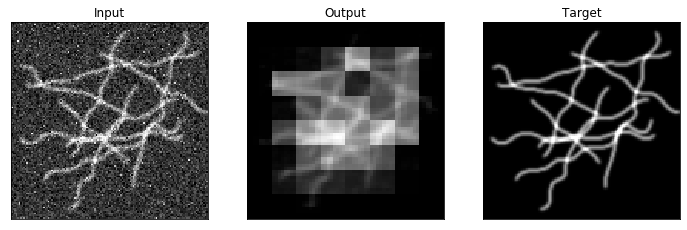

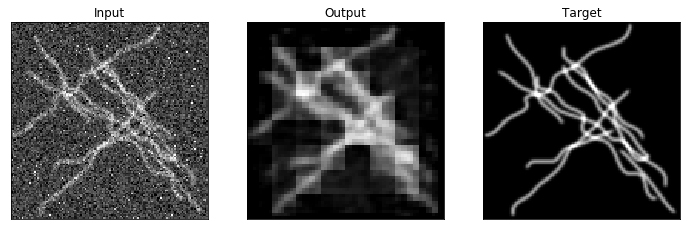

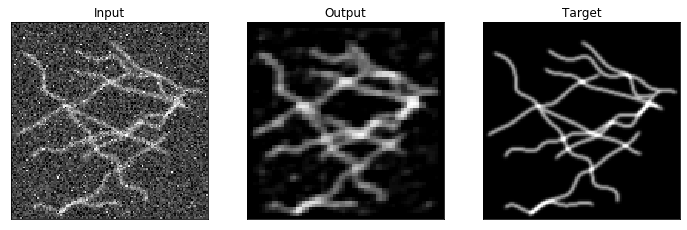

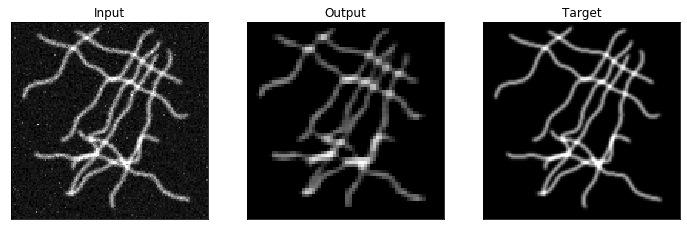

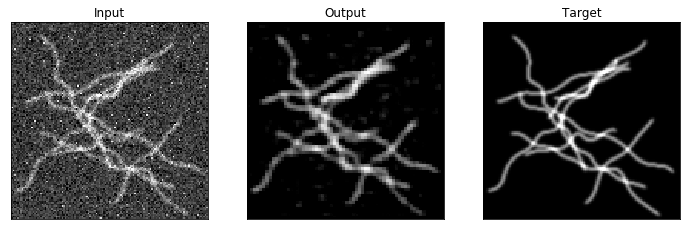

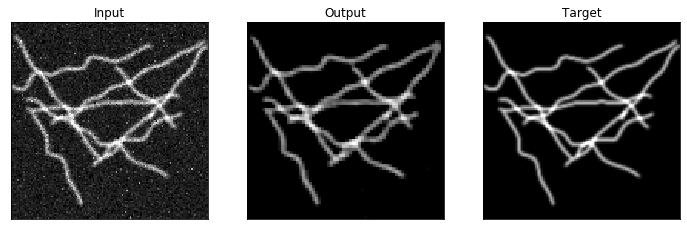

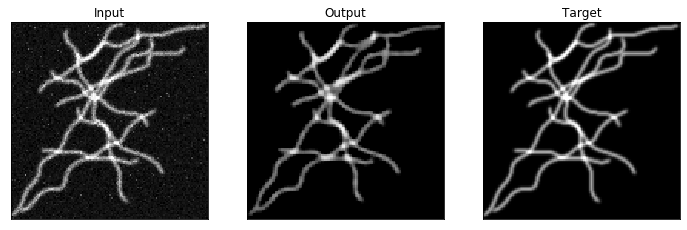

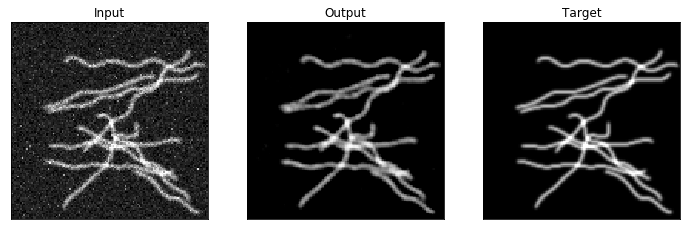

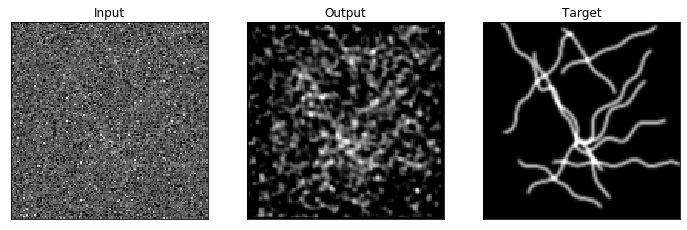

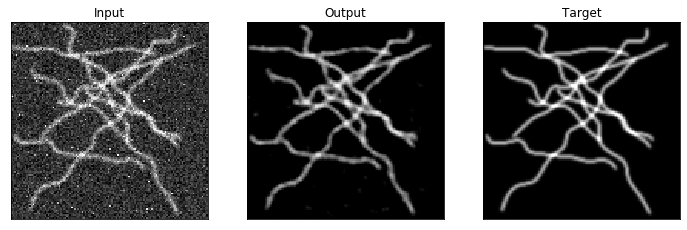

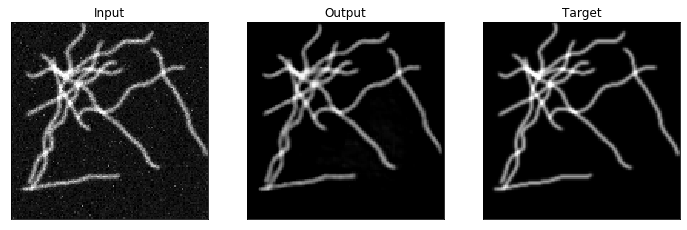

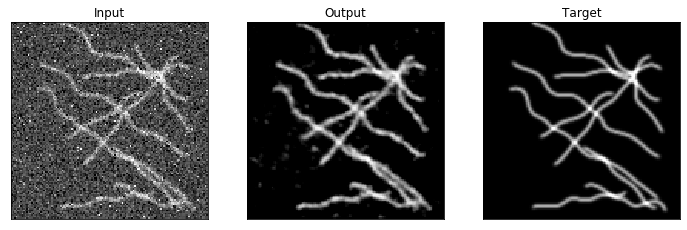

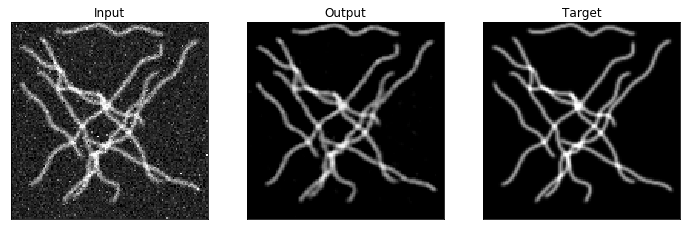

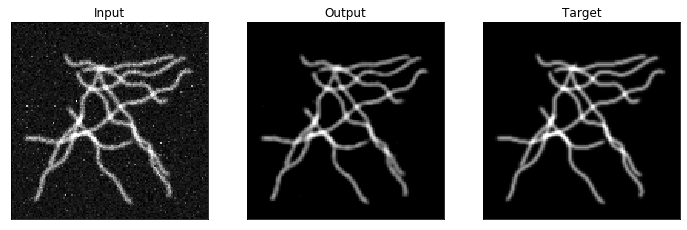

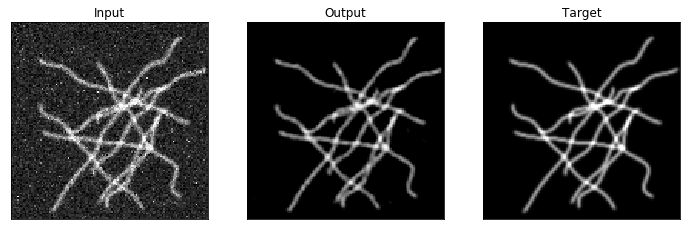

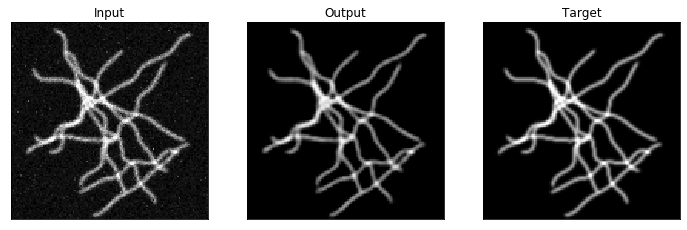

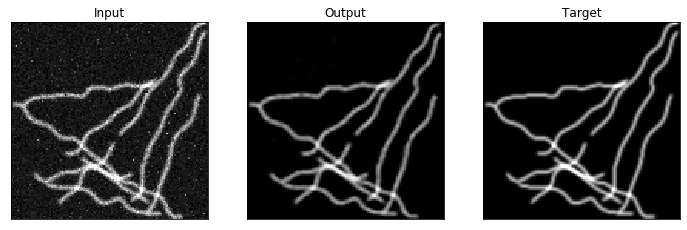

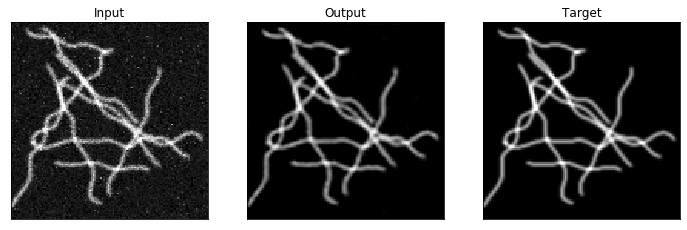

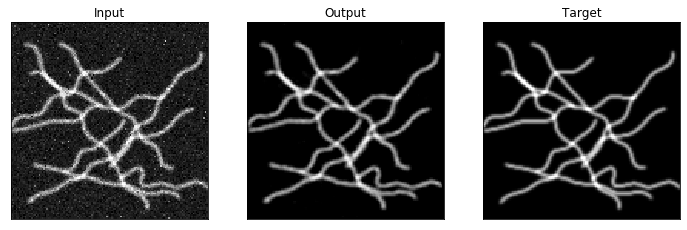

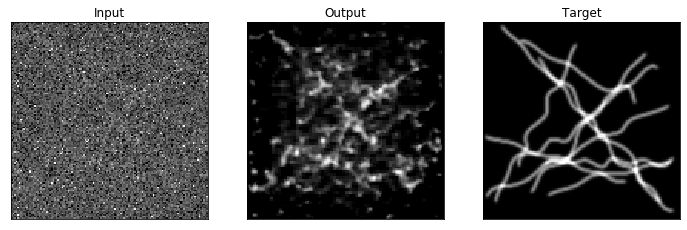

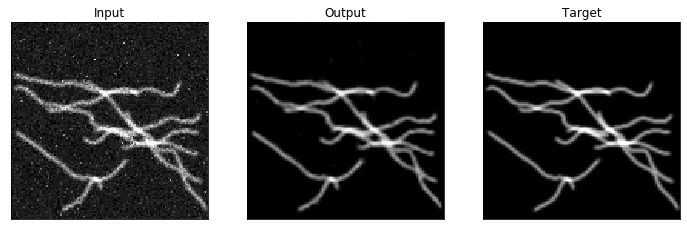

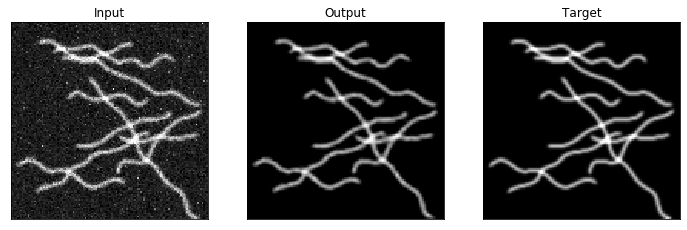

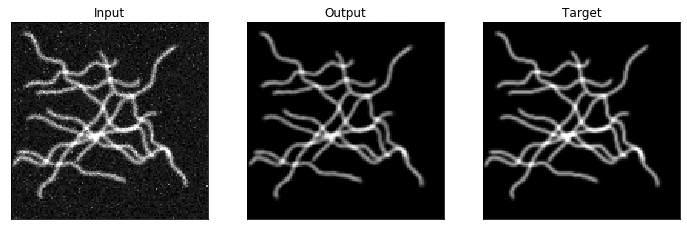

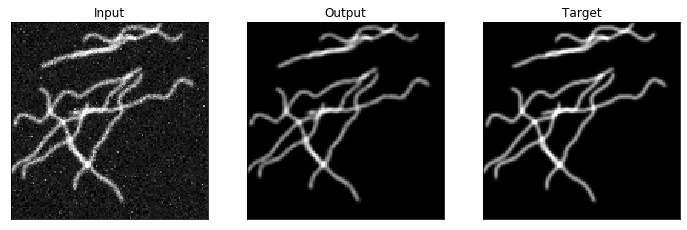

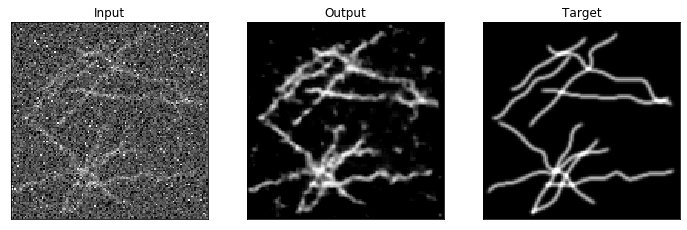

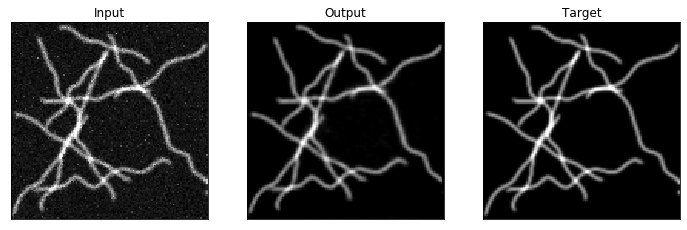

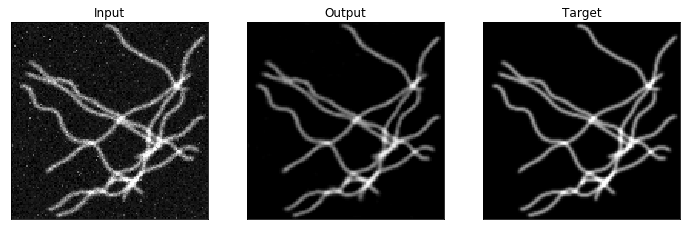

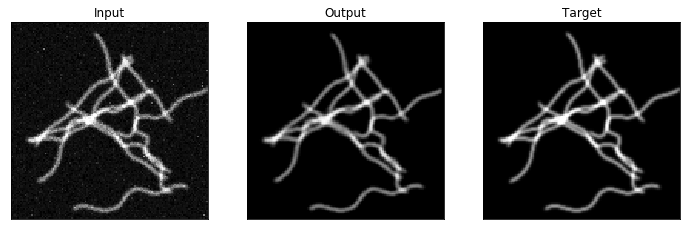

In [12]:
for epoch in range(n_epoch):
    
    for i, (noisy, clean) in enumerate(loader):
        noisy_images, clean_images = noisy.type(torch.FloatTensor).to(device), clean.type(torch.FloatTensor).to(device)
        
        optimizer.zero_grad()
    
        net_output = model(noisy_images)
        loss = loss_function(net_output, clean_images)
 
        loss.backward()
    
        optimizer.step()
    
         # print statistics
        print('[%d, %5d] loss: %.5f' % (epoch + 1, i + 1, loss.item()))
    
    if (epoch % 10 == 0):
        index = 30
        plot_tensors([noisy_images[index,0,:], net_output[index,0,:], clean_images[index,0,:]], ['Input','Output','Target'])

print('Finished Training')

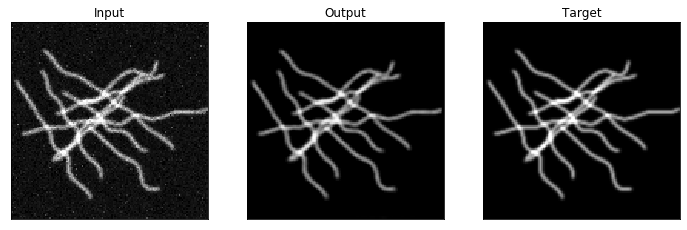

In [13]:
index = 30
plot_tensors([noisy_images[index,0,:], net_output[index,0,:], clean_images[index,0,:]], ['Input','Output','Target'])

In [14]:
torch.save(model.state_dict(), './models/MT_simulation_iter300_model_nearestup')